In [295]:
from utilities.data_loader import load_modeling_data

In [296]:
train_data, train_labels = load_modeling_data()

In [297]:
print(train_data.head())

                                                 text
id                                                   
0                   Anyway Im getting of for a while 
1   My red, Apache isn't feelin too well this morn...
2   @danyelljoy you should be  its great. friday w...
3   its 11:30pm and i dont wanna sleep; so i debat...
4           Why does twitter eat my DM's?  Not happy 


In [298]:
print(train_labels.head())

      target
id          
0   positive
1   negative
2   positive
3   positive
4   negative


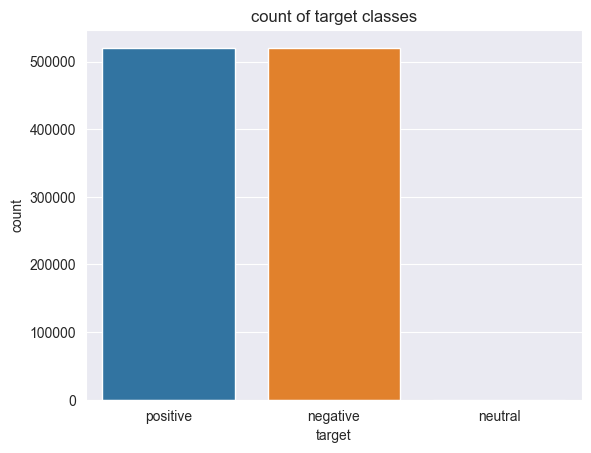

In [299]:
sns.set_style("darkgrid")
sns.countplot(x = train_labels['target'])
plt.title('count of target classes')
plt.show()

In [300]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels['target'] = le.fit_transform(train_labels['target'])


In [301]:
import matplotlib.pyplot as plt

In [302]:
import seaborn as sns

In [303]:
train_labels['target'].values

array([2, 0, 2, ..., 0, 2, 0])

In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels, test_size= 0.2, random_state=8)

In [305]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif,SelectPercentile

In [306]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train['text'])
X_test = cv.transform(X_test['text'])

In [307]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train['target'].values)
y_test = le.transform(y_test['target'].values)

In [116]:
def mutual_info(x_train, y_train, x_test, feature_names):
    mutual = SelectKBest(mutual_info_classif, k=50)
    x_train_features = mutual.fit_transform(x_train, y_train)
    x_test_features = mutual.transform(x_test)
    feature_indices = mutual.get_support(indices=True)
    selected_features = [feature_names[i] for i in mutual.get_support(indices=True)]
    return x_train_features, x_test_features, feature_indices, selected_features

In [157]:
mutual = SelectKBest(chi2, k=50)

In [158]:
mutual.fit(X_train, y_train)

SelectKBest(k=50, score_func=<function chi2 at 0x2842c6dc0>)

In [159]:
X_train = mutual.transform()

TypeError: transform() missing 1 required positional argument: 'X'

In [160]:
feature_selection = SelectPercentile(chi2, percentile=10)
df_train = feature_selection.fit_transform(X_train, y_train)
df_test = feature_selection.transform(X_test)

In [161]:
df_train.shape

(832258, 44008)

In [162]:
X_train.shape

(832258, 440087)

In [139]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [140]:
y_pred = nb.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(y_pred, y_test)

0.7783288876072382

In [144]:
nb.fit(df_train, y_train)
y_pred = nb.predict(df_test)
accuracy_score(y_pred, y_test)

0.7783192752264917

In [184]:
x = [x for x in range(5,101, 5)]
x

[5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100]

In [185]:
res = {}
for item in x:
    feature_selection = SelectPercentile(chi2, percentile=item)
    df_train = feature_selection.fit_transform(X_train, y_train)
    df_test = feature_selection.transform(X_test)
    nb.fit(df_train, y_train)
    y_pred = nb.predict(df_test)
    acc = accuracy_score(y_pred, y_test)
    res[item] = acc
    

In [186]:
res

{5: 0.7778819119025304,
 10: 0.7783192752264917,
 15: 0.7786653209333622,
 20: 0.7782664071323865,
 25: 0.7780212914233533,
 30: 0.7774781919111816,
 35: 0.7768005190685603,
 40: 0.7760892028933266,
 45: 0.7752096700550308,
 50: 0.7745368034027827,
 55: 0.7736620767548602,
 60: 0.7739216110350131,
 65: 0.7750414533919688,
 70: 0.7754740105255569,
 75: 0.7763247062216134,
 80: 0.7768918366856511,
 85: 0.777583928099392,
 90: 0.777920361425516,
 95: 0.7783384999879845,
 100: 0.7783288876072382}

In [187]:
import matplotlib.pyplot as plt
res.keys()

dict_keys([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100])

(0.0, 100.0)

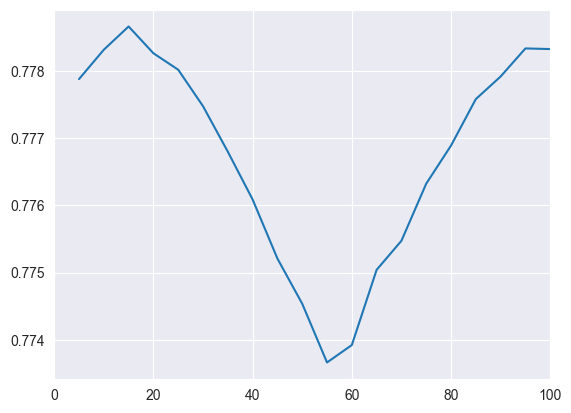

In [191]:
plt.plot(res.keys(), res.values())
plt.xlim(0,100)

# plt.ylim(0.5,1.0)

In [278]:
max(res, key=res.get)
from sklearn.linear_model import LogisticRegression

In [284]:
kbest = SelectKBest(chi2, k = 10000)

In [285]:
kbest.fit(X_train, y_train)

SelectKBest(k=10000, score_func=<function chi2 at 0x2842c6dc0>)

In [286]:
df_train = kbest.transform(X_train)